# 사회초년생들을 위한 효율적인 차종 추천

# 유종 & 복합연비 & 등급 EDA 

### 0. 변수 설명
- 모델명 : 자동차 모델명 
- 제조사 : 국내외 자동차 제조사
- 유종 : 자동차 유종
- 배기량 : 자동차 배기량
- 변속형식 : 자동차 변속기어형식
- 복합연비 : 도심연비와 고속도로주행 연비에 각각 55%, 45%의 가중치를 적용하여 산출된 연비
- 등급 : 복합연비를 기준으로 나눈 등급, 배기량에 상관없이 복합연비가 높은 차량에 높은 등급(1등급)을 부여하고 복합연비가 낮은 차량에는 낮은 등급(5등급)을 부여
- CO2배출량 : 자동차 이산화탄소 배출량

### 데이터셋 불러오기

In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('자동차 에너지소비효율등급 인증 현황_190903.csv', encoding = 'CP949')
data

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0
...,...,...,...,...,...,...,...,...
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0,없음,93.7,FCEV,0.0
2083,Danigo(다니고),대창모터스,전기,0,없음,5.3,저속,0.0
2084,Change,AD 모터스,전기,0,없음,4.3,저속,0.0
2085,코나 전기자동차 (도심형),현대,전기,0,없음,5.8,고속,0.0


In [28]:
data.dtypes

모델명        object
제조사        object
유종         object
배기량         int64
변속형식       object
복합연비      float64
등급         object
CO2배출량    float64
dtype: object

# 1. 유종

In [29]:
유종=data.groupby(['유종'])['유종'].count()
유종

유종
LPG         64
경유         790
수소           3
전기          75
전기+휘발유      29
휘발유       1126
Name: 유종, dtype: int64

In [30]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

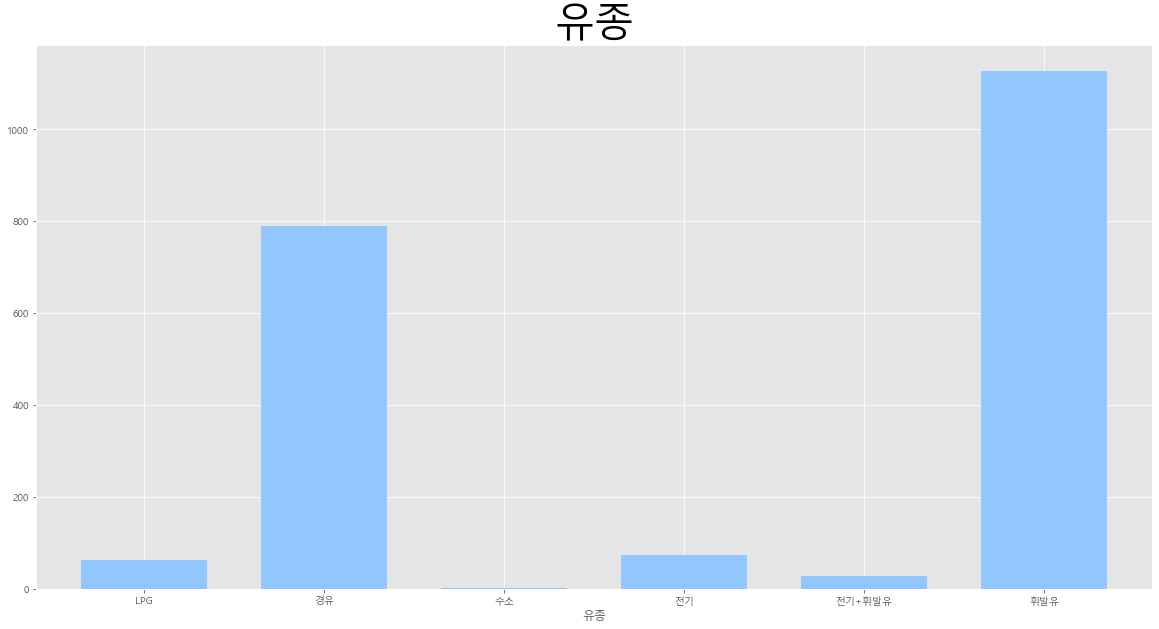

In [31]:
plt.style.use( 'seaborn-pastel' )
유종.plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.7 )
plt.title( '유종', size = 40 )
plt.xticks( rotation = 'horizontal' )
plt.show()

- 휘발유, 경유가 가장 높은 수치를 보였다.

# 2. 복합연비에 따른 등급 구분

In [32]:
from IPython.display import Image

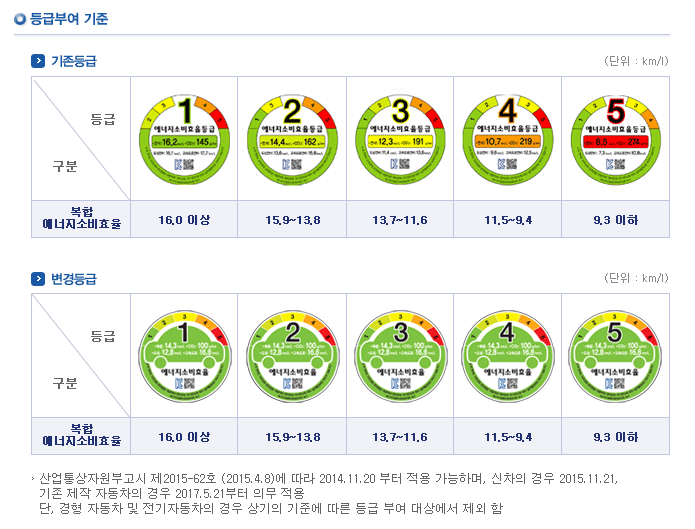

In [33]:
Image("복합연비 등급 기준 표 .png")

- 한국에너지공단의 자동차표시연비 중 자동차 연비에 따른 등급 분류 표를 기준으로 등급을 나누었다. 

In [34]:
복합연비=data.groupby(['복합연비'])['복합연비'].count()
복합연비

복합연비
1.6      1
2.3      1
2.4      1
3.1      3
3.4     12
        ..
22.4     2
28.3     1
91.7     1
93.7     1
96.2     1
Name: 복합연비, Length: 166, dtype: int64

### 2.1 1등급

In [35]:
data[data['복합연비']>16]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0
...,...,...,...,...,...,...,...,...
1961,K5 2.0GDI 플러그인 하이브리드(15),기아,전기+휘발유,1999,자동6,16.4,PHEV,29.0
1963,쏘나타 2.0GDI 플러그인하이브리드,현대,전기+휘발유,1999,자동6,17.2,PHEV,29.0
2009,모닝 1.0가솔린 밴형 (2015년형),기아,휘발유,998,수동5,16.2,경형,104.0
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,998,수동5,16.2,경형,104.0


- PHEV, FCEV, 경형과 같은 유형까지 포함되어 나타났다.

### 2.2 2등급

In [36]:
data[(data['복합연비']>13.8) & (data['복합연비']<15.9)]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
81,"QM6 1.7 DIESEL (2WD 19"" Tire)",르노삼성,경유,1749,무단변속,14.2,2등급,134.0
82,"QM6 1.7 DIESEL (2WD 17"" Tire)",르노삼성,경유,1749,무단변속,14.4,2등급,132.0
83,티볼리 1.6 디젤 2WD 6AT SCR,쌍용,경유,1597,자동6,14.5,2등급,130.0
84,A6 40 TDI,아우디,경유,1968,자동7,15.8,2등급,119.0
85,DS3 Crossback 1.5 BlueHDi,PSA,경유,1499,자동8,15.6,2등급,120.0
...,...,...,...,...,...,...,...,...
1998,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.2,경형,109.0
1999,스파크 1.0 MT,한국지엠,휘발유,999,수동5,15.2,경형,109.0
2001,모닝 1.0TCI (2015년형),기아,휘발유,998,무단변속,14.0,경형,122.0
2003,모닝 1.0가솔린 (2015년형),기아,휘발유,998,자동4,15.2,경형,112.0


- 마찬가지로 경형이란 유형이 포함되어 나타났다.

### 2.3 3등급

In [37]:
data[(data['복합연비']>11.6) & (data['복합연비']<13.7)]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
290,RVR(2WD),미쓰비시,휘발유,1998,무단변속,12.8,2등급,183.0
291,티볼리 1.6 디젤 AWD 6AT SCR,쌍용,경유,1597,자동6,13.6,3등급,139.0
292,티볼리 가솔린 1.5 MT 2WD 기준4,쌍용,휘발유,1497,수동6,12.1,3등급,136.0
294,S350 d,벤츠,경유,2925,자동9,12.7,3등급,152.0
295,CLS400 d 4Matic,벤츠,경유,2925,자동9,11.7,3등급,165.0
...,...,...,...,...,...,...,...,...
2000,모닝 1.0Bi-fuel LPI (2015년형),기아,LPG,998,수동5,13.2,경형,99.0
2002,레이 1.0가솔린 (2015년형),기아,휘발유,998,자동4,13.5,경형,128.0
2004,레이 1.0TCI (2015년형),기아,휘발유,998,무단변속,13.2,경형,131.0
2006,모닝 1.0Bi-fuel LPI (2015년형),기아,LPG,998,자동4,12.4,경형,106.0


- 참고 표로는 3등급이여야 하는데 2등급으로 나타나는 결과가 발생했다. (1건)
- 경형과 같은 유형이 포함되어 나타났다.

### 2.4 4등급

In [38]:
data[(data['복합연비']>9.4) & (data['복합연비']<11.5)]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
727,아웃랜더 2.4,미쓰비시,휘발유,2360,무단변속,10.7,3등급,220.0
728,벤츠 E 350 4MATIC,벤츠,휘발유,1991,자동9,10.3,4등급,169.0
729,벤츠 CLS 450 4MATIC,벤츠,휘발유,2999,자동9,9.8,4등급,178.0
730,Mercedes-AMG E 53 4MATIC +,벤츠,휘발유,2999,자동9,9.5,4등급,185.0
731,Mercedes-AMG CLS 53 4MATIC +,벤츠,휘발유,2999,자동9,9.5,4등급,183.0
...,...,...,...,...,...,...,...,...
1954,볼보 XC90T8 AWD,볼보,전기+휘발유,1969,자동8,9.5,PHEV,68.0
1971,레이 1.0LPI (PE),기아,LPG,998,자동4,10.5,경형,123.0
1972,레이 1.0Bi-fuel (15),기아,LPG,998,자동4,10.3,경형,126.0
1981,모닝(JA) 1.0LPI_16인치 (15),기아,LPG,998,자동4,11.0,경형,117.0


- 참고 표로는 4등급이여야 하는데 3등급으로 나타나는 결과가 발생했다. (1건)
- PHEV, 경형과 같은 유형이 포함되어 나타났다.

### 2.5 5등급

In [39]:
data[(data['복합연비']<9.3)]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1264,911 카레라 S 카브리올레,포르쉐,휘발유,3800,수동6,8.4,4등급,277.0
1265,911 카레라 4,포르쉐,휘발유,3614,자동7,8.5,4등급,277.0
1266,911 타르가 4,포르쉐,휘발유,3614,자동7,8.5,4등급,277.0
1267,911 카레라 4 카브리올레,포르쉐,휘발유,3614,자동7,8.5,4등급,277.0
1268,911 카레라 S,포르쉐,휘발유,3800,수동6,8.4,4등급,277.0
...,...,...,...,...,...,...,...,...
2081,레이 전기차,기아,전기,0,없음,5.0,고속,0.0
2083,Danigo(다니고),대창모터스,전기,0,없음,5.3,저속,0.0
2084,Change,AD 모터스,전기,0,없음,4.3,저속,0.0
2085,코나 전기자동차 (도심형),현대,전기,0,없음,5.8,고속,0.0


- 참고 표로는 5등급이여야 하는데 4등급으로 나타나는 결과가 발생했다. (8건)
- 고속, 저속과 같은 유형이 포함되어 나타났다.

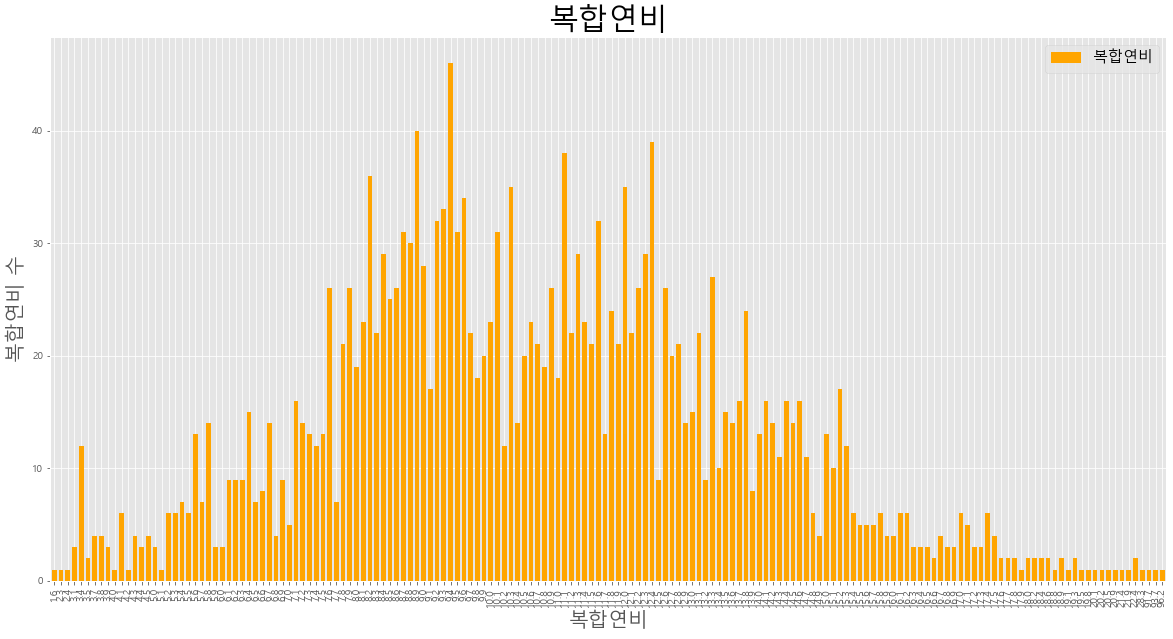

In [40]:
# 스타일 서식 지정
plt.style.use( 'ggplot' )

# 그림 사이즈 지정( 가로 14인치, 세로 5인치 )
plt.figure( figsize = ( 14, 5 ) )


# x, y축 데이터를 plot함수에 입력, 마커 표시 추가
복합연비.plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.7,
           color = 'orange' )

# 차트 제목 추가
plt.title( '복합연비', size = 30 )

# 축 이름 추가
plt.xlabel( '복합연비', size = 20 )
plt.ylabel( '복합연비 수', size = 20 )

# 범례 표시
plt.legend( labels = [ '복합연비' ], loc = 'best', fontsize = 15 )


plt.show() # 변경사항 저장하고 그래프 출력

- 단순히 복합연비로 구분을 하기 보단 다른 기준을 토대로 구간을 정하고 분석을 진행해야 할 것 같다.

## 복합연비에 따른 등급 구분 결과
- 참고 표를 토대로 구분했을 때 해당 등급에 해당하지 않는 경우가 발생했다. 
- 1~5등급에 해당되지 않는 구분 유형도 포함되어 나타났다. 
- 조사결과 복합연비를 통해 등급을 부여한다는 사실을 알아냈다. 복합연비 변수와 등급 변수는 함께 다뤄야 할 변수라는 결론을 얻었다.

# 3. 전처리

In [41]:
등급=data.groupby(['등급'])['등급'].count()
등급

등급
1등급      81
2등급     210
3등급     437
4등급     542
5등급     663
FCEV      3
PHEV     29
경형       47
고속       73
저속        2
Name: 등급, dtype: int64

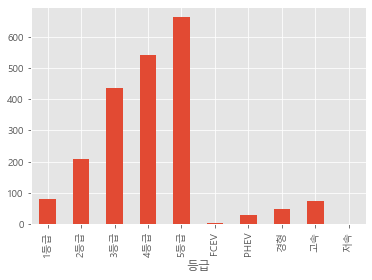

In [42]:
등급.plot( kind = 'bar' )

- 5등급, 4등급, 3등급, 2등급, 1등급 순으로 등급이 나타났다. 

# 1등급

In [43]:
data[data['등급']=='1등급']

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0
...,...,...,...,...,...,...,...,...
76,쏘나타(LF) 1.7디젤 7DCT_ISG (16인치 타이어),현대,경유,1685,자동7,16.8,1등급,115.0
77,토요타 PRIUS V,토요타,휘발유,1798,무단변속,17.4,1등급,92.0
78,쏘나타 2.0GDI 하이브리드(16인치 타이어),현대,휘발유,1999,자동6,18.2,1등급,91.0
79,쏘나타 2.0GDI 하이브리드(17인치 타이어),현대,휘발유,1999,자동6,17.7,1등급,94.0


- 1등급은 81대가 등록되어 있다.

In [44]:
a = data[data['등급']=='1등급']

# 2등급 

In [45]:
data[data['등급']=='2등급']

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
81,"QM6 1.7 DIESEL (2WD 19"" Tire)",르노삼성,경유,1749,무단변속,14.2,2등급,134.0
82,"QM6 1.7 DIESEL (2WD 17"" Tire)",르노삼성,경유,1749,무단변속,14.4,2등급,132.0
83,티볼리 1.6 디젤 2WD 6AT SCR,쌍용,경유,1597,자동6,14.5,2등급,130.0
84,A6 40 TDI,아우디,경유,1968,자동7,15.8,2등급,119.0
85,DS3 Crossback 1.5 BlueHDi,PSA,경유,1499,자동8,15.6,2등급,120.0
...,...,...,...,...,...,...,...,...
286,짚 체로키,크라이슬러,경유,1956,자동9,14.0,2등급,141.0
287,그랜저 2.2 디젤(17인치 타이어),현대,경유,2199,자동6,14.0,2등급,142.0
288,그랜저 2.2 디젤(18인치 타이어),현대,경유,2199,자동6,13.8,2등급,144.0
289,300C,크라이슬러,경유,2987,자동5,13.8,2등급,143.0


- 2등급은 210대가 등록되어 있다.

In [46]:
b = data[data['등급']=='2등급']

# 3등급

In [47]:
data[data['등급']=='3등급']

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
291,티볼리 1.6 디젤 AWD 6AT SCR,쌍용,경유,1597,자동6,13.6,3등급,139.0
292,티볼리 가솔린 1.5 MT 2WD 기준4,쌍용,휘발유,1497,수동6,12.1,3등급,136.0
293,티볼리 가솔린 1.5 AT 2WD 기준4 (16인치 타이어),쌍용,휘발유,1497,자동6,11.6,3등급,143.0
294,S350 d,벤츠,경유,2925,자동9,12.7,3등급,152.0
295,CLS400 d 4Matic,벤츠,경유,2925,자동9,11.7,3등급,165.0
...,...,...,...,...,...,...,...,...
723,피아트 500,크라이슬러,휘발유,1368,자동6,12.4,3등급,140.0
724,RVR(4WD),미쓰비시,휘발유,1998,무단변속,12.4,3등급,189.0
725,아웃랜더 2.4,미쓰비시,휘발유,2360,무단변속,11.8,3등급,198.0
726,랜서,미쓰비시,휘발유,1998,무단변속,12.6,3등급,186.0


- 3등급은 437대가 등록되어 있다.

In [48]:
c = data[data['등급']=='3등급']

# 4등급

In [49]:
data[data['등급']=='4등급']

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
728,벤츠 E 350 4MATIC,벤츠,휘발유,1991,자동9,10.3,4등급,169.0
729,벤츠 CLS 450 4MATIC,벤츠,휘발유,2999,자동9,9.8,4등급,178.0
730,Mercedes-AMG E 53 4MATIC +,벤츠,휘발유,2999,자동9,9.5,4등급,185.0
731,Mercedes-AMG CLS 53 4MATIC +,벤츠,휘발유,2999,자동9,9.5,4등급,183.0
732,티볼리 가솔린 1.5 AT 2WD 기준4 (18인치 타이어),쌍용,휘발유,1497,자동6,11.4,4등급,145.0
...,...,...,...,...,...,...,...,...
1265,911 카레라 4,포르쉐,휘발유,3614,자동7,8.5,4등급,277.0
1266,911 타르가 4,포르쉐,휘발유,3614,자동7,8.5,4등급,277.0
1267,911 카레라 4 카브리올레,포르쉐,휘발유,3614,자동7,8.5,4등급,277.0
1268,911 카레라 S,포르쉐,휘발유,3800,수동6,8.4,4등급,277.0


- 4등급은 542대가 등록되어 있다.

In [50]:
d = data[data['등급']=='4등급']

# 5등급

In [51]:
data[data['등급']=='5등급']

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1270,Mercedes-AMG GT 43 4MATIC+,벤츠,휘발유,2999,자동9,8.5,5등급,205.0
1271,벤츠 GLE 450 4MATIC,벤츠,휘발유,2999,자동9,8.8,5등급,198.0
1272,Mercedes-AMG GT63 S 4Matic +,벤츠,휘발유,3982,자동9,7.2,5등급,245.0
1273,Mercedes-Maybach S650 pullman,벤츠,휘발유,5980,자동7,5.5,5등급,331.0
1274,Mercedes-AMG GLC43 4Matic Coupe,벤츠,휘발유,2996,자동9,8.4,5등급,208.0
...,...,...,...,...,...,...,...,...
1928,911 카레라 S 카브리올레,포르쉐,휘발유,3800,자동7,8.2,5등급,285.0
1929,911 카레라 S,포르쉐,휘발유,3800,자동7,8.2,5등급,285.0
1930,렌서 에볼루션,미쓰비시,휘발유,1998,자동6,8.1,5등급,289.0
1931,Gallardo LP560-4,람보르기니,휘발유,5204,자동6,6.5,5등급,359.0


- 5등급은 663대가 등록되어 있다.

In [52]:
e = data[data['등급']=='5등급']

# FCEV

In [53]:
data[(data['등급']=='FCEV')]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1933,넥쏘 수소전기차(17인치타이어),현대,수소,0,없음,96.2,FCEV,0.0
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,0,없음,91.7,FCEV,0.0
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0,없음,93.7,FCEV,0.0


- FCEV는 3대가 등록되어 있다.

In [54]:
f = data[(data['등급']=='FCEV')]

# PHEV

In [55]:
data[(data['등급']=='PHEV')]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1935,E300e,벤츠,전기+휘발유,1991,자동9,13.9,PHEV,49.0
1936,BMW 745Le iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0
1937,볼보 S90T8 AWD,볼보,전기+휘발유,1969,자동8,15.0,PHEV,64.0
1938,BMW 745e iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0
1939,아이오닉 1.6GDI 플러그인하이브리드 개조차_6DCT,현대,전기+휘발유,1580,자동6,28.3,PHEV,17.0
1940,BMW i8 LCI,BMW,전기+휘발유,1499,자동6,17.4,PHEV,55.0
1941,BMW i8 Roadster,BMW,전기+휘발유,1499,자동6,17.4,PHEV,55.0
1942,볼보 XC60T8 AWD,볼보,전기+휘발유,1969,자동8,14.6,PHEV,67.0
1943,볼보 XC90T8 AWD,볼보,전기+휘발유,1969,자동8,13.3,PHEV,68.0
1944,볼보 XC90T8 AWD,볼보,전기+휘발유,1969,자동8,13.3,PHEV,68.0


- PHEV는 29대가 등록되어 있다.

In [56]:
g = data[(data['등급']=='PHEV')]

# 경형

In [57]:
data[(data['등급']=='경형')]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1964,스파크 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109.0
1965,스파크 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109.0
1966,스파크 밴 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109.0
1967,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109.0
1968,"레이 1.0가솔린 (PE, 15인치 타이어)",기아,휘발유,998,자동4,12.7,경형,130.0
1969,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)",기아,휘발유,998,자동4,13.0,경형,127.0
1970,"레이 1.0가솔린 (PE, 14인치 타이어)",기아,휘발유,998,자동4,13.0,경형,127.0
1971,레이 1.0LPI (PE),기아,LPG,998,자동4,10.5,경형,123.0
1972,레이 1.0Bi-fuel (15),기아,LPG,998,자동4,10.3,경형,126.0
1973,레이 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,12.7,경형,129.0


- 경형은 47대가 등록되어 있다.

In [58]:
h = data[(data['등급']=='경형')]

# 고속

In [59]:
data[(data['등급']=='고속')]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
2011,파워프라자 봉고3ev PEACE,기아,전기,0,없음,2.4,고속,0.0
2012,D2C,쎄미시스코,전기,0,없음,5.2,고속,0.0
2013,Model X Standard Range,테슬라,전기,0,없음,3.8,고속,0.0
2014,Model X Performance,테슬라,전기,0,없음,3.7,고속,0.0
2015,Model X Standard Range,테슬라,전기,0,없음,3.8,고속,0.0
...,...,...,...,...,...,...,...,...
2079,EV SAVER(파워테크닉스 세이버 KNCSZ76ADK803665),파워테크닉스,전기,0,없음,1.6,고속,0.0
2080,쏘울 전기차,기아,전기,0,없음,5.0,고속,0.0
2081,레이 전기차,기아,전기,0,없음,5.0,고속,0.0
2085,코나 전기자동차 (도심형),현대,전기,0,없음,5.8,고속,0.0


- 고속은 73대가 등록되어 있다.

# 저속

In [60]:
data[(data['등급']=='저속')]

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
2083,Danigo(다니고),대창모터스,전기,0,없음,5.3,저속,0.0
2084,Change,AD 모터스,전기,0,없음,4.3,저속,0.0


- 저속은 2대가 등록되어 있다.

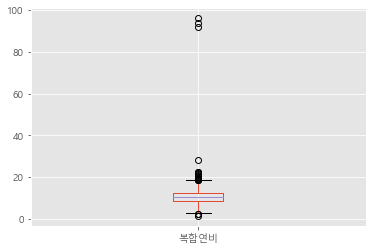

In [61]:
data[ '복합연비' ].plot( kind = 'box' )

- 이상치 3개는 복합연비 중 FCEV로 나타났다.